In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
dtypes_dict = {'created':'str', 'application_id': 'category', 'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_languaje': 'category'}

installs = pd.read_csv('data/train_installs.csv.gzip', parse_dates=['created'], low_memory=False)
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
# installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [16]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'trans_id':'category', 'device_os':'category', \
              'wifi':object, 'connection_type':'category'}

events = pd.read_csv('data/train_events.csv.gzip', parse_dates= ['date'], low_memory=False)

In [2]:
dtypes_dict = {'advertiser_id':'category', 'action_id': np.float64, 'source_id': np.int8, 'created': str, \
                'country_code': np.int64, 'latitude': np.float64, 'longitude': np.float64, 'wifi_connection': bool, \
                'carrier_id': np.float16, 'os_minor': np.float32, 'os_major': np.float32, 'agent_device': np.float64, \
                'specs_brand': 'category', 'brand': np.float16, 'timeToClick': np.float64, 'touchX': np.float16, \
                'touchY': np.float16, 'ref_type': 'category', 'ref_hash': np.int64}

clicks = pd.read_csv('data/train_clicks.csv.gzip', dtype=dtypes_dict)

In [2]:
auctions = pd.read_csv("data/train_auctions.csv.gzip", parse_dates=['date'])

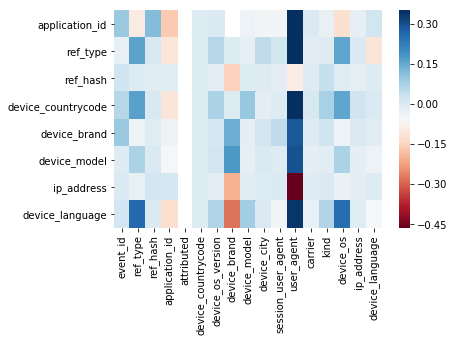

In [12]:
corre = pd.concat([installs, events], axis=1, keys=['installs', 'events']).corr().loc['installs', 'events']
sns.heatmap(corre, cmap='RdBu')

In [8]:
print(installs.columns)
print(events.columns)
print(auctions.columns)
print(clicks.columns)

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')
Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')
Index(['auction_type_id', 'country', 'date', 'device_id', 'platform',
       'ref_type_id', 'source_id'],
      dtype='object')
Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major'

In [45]:
clicks['source_id'].value_counts().head()

0    17009
1     4298
6     3371
5     1628
2       27
Name: source_id, dtype: int64

In [18]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [39]:
# events.head()

In [21]:
# events['application_id'].value_counts()

In [42]:
ins_even = pd.merge(installs, events, on='ref_hash', how='inner')

In [54]:
ins_even.drop('kind_x', axis=1, inplace=True)
ins_even.drop('session_user_agent_x', axis=1, inplace=True)
ins_even.drop('wifi_x', axis=1, inplace=True)
ins_even.drop('wifi_y', axis=1, inplace=True)

In [55]:
for colum in ins_even.columns:
    x =  ins_even[colum].value_counts()
    if len(x) <= 20:
        print(colum)
        print(x)
    else: 
        print(colum, 'MEJOR NO')

created MEJOR NO
application_id_x MEJOR NO
ref_type_x
1891515180541284343    36116
1494519392962156891    17041
Name: ref_type_x, dtype: int64
ref_hash MEJOR NO
attributed_x
False    53157
Name: attributed_x, dtype: int64
implicit
False    38866
True     14291
Name: implicit, dtype: int64
device_countrycode_x
6333597102633388268    36732
2970470518450881158    16425
Name: device_countrycode_x, dtype: int64
device_brand_x MEJOR NO
device_model_x MEJOR NO
user_agent_x MEJOR NO
event_uuid_x MEJOR NO
trans_id_x
{hash}    1850
Name: trans_id_x, dtype: int64
ip_address_x MEJOR NO
device_language_x MEJOR NO
date MEJOR NO
event_id MEJOR NO
ref_type_y
1891515180541284343    36116
1494519392962156891    17041
Name: ref_type_y, dtype: int64
application_id_y MEJOR NO
attributed_y
False    53048
True       109
Name: attributed_y, dtype: int64
device_countrycode_y
6333597102633388268    53157
Name: device_countrycode_y, dtype: int64
device_os_version MEJOR NO
device_brand_y MEJOR NO
device_model_y M

In [9]:
installs['trans_id'].isin(events['trans_id']).value_counts()

True     3409
False       3
Name: trans_id, dtype: int64

In [40]:
installs.isin(events).any()

created               False
application_id        False
ref_type               True
ref_hash              False
attributed             True
implicit              False
device_countrycode     True
device_brand           True
device_model           True
session_user_agent    False
user_agent            False
event_uuid            False
kind                  False
wifi                   True
trans_id              False
ip_address             True
device_language        True
dtype: bool

In [5]:
set(installs.columns).intersection(set(events.columns))

{'application_id',
 'attributed',
 'device_brand',
 'device_countrycode',
 'device_language',
 'device_model',
 'event_uuid',
 'ip_address',
 'kind',
 'ref_hash',
 'ref_type',
 'session_user_agent',
 'trans_id',
 'user_agent',
 'wifi'}

In [30]:
# isin1 = events['application_id'].dropna().isin(installs['application_id'].dropna())
# df1 = isin1.loc[isin1 == True]
# print(len(df1))
# isin2 = installs['application_id'].dropna().isin(events['application_id'].dropna())
# df2 = isin2.loc[isin2 == True]
# print(len(df2))
# s2 = events.iloc[df1.keys()]['application_id'].value_counts().reset_index()
# s2.columns = ['application_id', 'app_event']
# s1 = installs.iloc[df2.keys()]['application_id'].value_counts().reset_index()
# s1.columns = ['application_id', 'app_install']
# ins_even = pd.merge(s1, s2, on='application_id', how='inner')

In [29]:
# sns.jointplot("app_event", "app_install", data=ins_even)
# sns.relplot(x="app_install", y="app_event", data=ins_even);
# ins_even.plot(kind='scatter', x='app_install',y='app_event', loglog=True)
# ins_even.head()
# ins_even.plot.bar(stacked=True);

In [268]:
ins_even['mean'] = ins_even.mean(axis=1)

In [25]:
# isin1 = events['ip_address'].dropna().isin(installs['ip_address'].dropna())
# df1 = isin1.loc[isin1 == True]
# print(len(df1))
# isin2 = installs['ip_address'].dropna().isin(events['ip_address'].dropna())
# df2 = isin2.loc[isin2 == True]
# print(len(df2))
# s2 = events.iloc[df1.keys()]['ip_address'].value_counts().reset_index()
# s2.columns = ['ip_address', 'ip_event']
# s1 = installs.iloc[df2.keys()]['ip_address'].value_counts().reset_index()
# s1.columns = ['ip_address', 'ip_install']
# ins_even2 = pd.merge(s1, s2, on='ip_address', how='inner')

In [21]:
# isin1 = events['device_brand'].dropna().isin(installs['device_brand'].dropna())
# df1 = isin1.loc[isin1 == True]
# print(len(df1))
# isin2 = installs['device_brand'].dropna().isin(events['device_brand'].dropna())
# df2 = isin2.loc[isin2 == True]
# print(len(df2))
# s2 = events.iloc[df1.keys()]['device_brand'].value_counts().reset_index()
# s2.columns = ['device_brand', 'device_event']
# s1 = installs.iloc[df2.keys()]['device_brand'].value_counts().reset_index()
# s1.columns = ['device_brand', 'device_install']
# ins_even3 = pd.merge(s1, s2, on='device_brand', how='inner')

In [10]:
auctions['day'] = pd.DatetimeIndex(auctions['date']).day;
auctions['hour'] = pd.DatetimeIndex(auctions['date']).hour;

In [26]:
ins_even = pd.merge(installs, events, on='ref_hash', how='inner')

Text(69.0, 0.5, 'Hora')

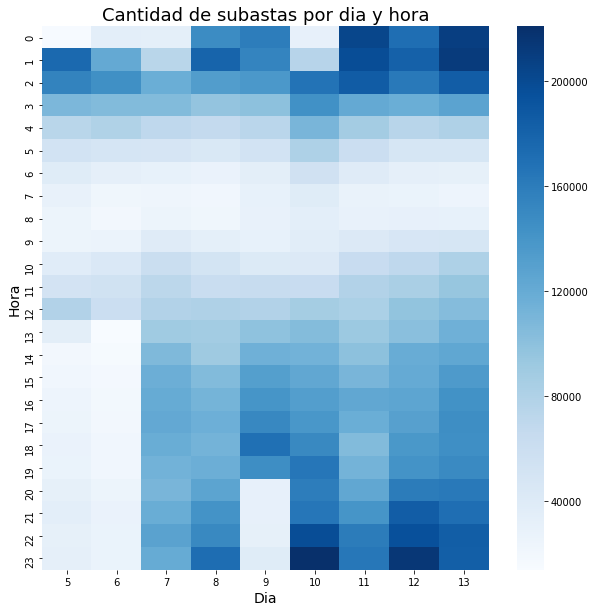

In [14]:
day_hours = auctions.groupby(['hour', 'day'])['day'].count().unstack()
day_hours = day_hours.fillna(0)
plt.figure(figsize=(10, 10))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")
heap_map.set_title("Cantidad de subastas por dia y hora", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

Text(69.0, 0.5, 'Hora')

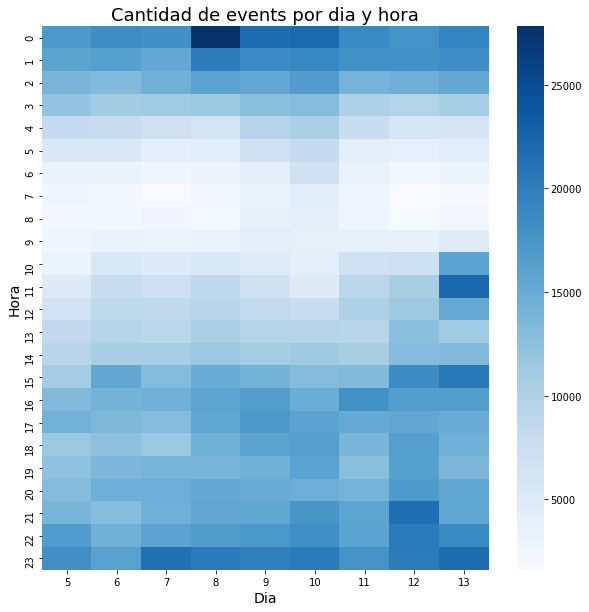

In [23]:
events['day'] = pd.DatetimeIndex(events['date']).day;
events['hour'] = pd.DatetimeIndex(events['date']).hour;
day_hours = events.groupby(['hour', 'day'])['day'].count().unstack()
day_hours = day_hours.fillna(0)
plt.figure(figsize=(10, 10))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")
heap_map.set_title("Cantidad de events por dia y hora", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

Text(69.0, 0.5, 'Hora')

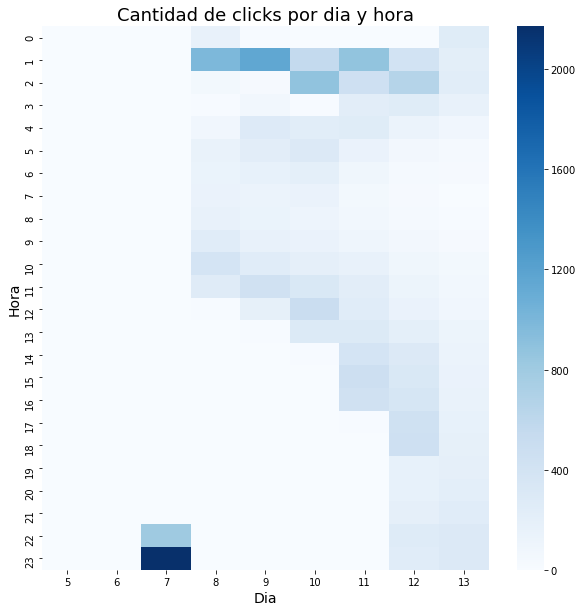

In [26]:
clicks['day'] = pd.DatetimeIndex(clicks['created']).day;
clicks['hour'] = pd.DatetimeIndex(clicks['created']).hour;
day_hours = clicks.groupby(['hour', 'day'])['day'].count().unstack()
day_hours = day_hours.fillna(0)
plt.figure(figsize=(10, 10))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")
heap_map.set_title("Cantidad de clicks por dia y hora", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

In [27]:
ref_hash_install_top = [x for x in installs['ref_hash'].value_counts().head(5).keys()]
ref_hash_install = installs.loc[installs['ref_hash'].isin(ref_hash_install_top)]

# ref_hash_events_top = [x for x in events['ref_hash'].value_counts().head(5).keys()]
# ref_hash_events = events.loc[events['ref_hash'].isin(ref_hash_events_top)]

ref_hash_clicks_top = [x for x in clicks['ref_hash'].value_counts().head(5).keys()]
ref_hash_clicks = clicks.loc[clicks['ref_hash'].isin(ref_hash_clicks_top)]

In [29]:
ins_click = pd.merge(ref_hash_install, ref_hash_clicks, on='ref_hash', how='inner')

In [33]:
# sns.jointplot("ref_hash", "created_x", data=ins_click)

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

In [13]:
# isin1 = auctions['source_id'].isin(clicks['source_id'])
# df1 = isin1.loc[isin1 == True]
# print(len(df1))
# isin2 = clicks['source_id'].isin(auctions['source_id'])
# df2 = isin2.loc[isin2 == True]
# print(len(df2))
# s2 = auctions.iloc[df1.keys()]['source_id'].value_counts().reset_index()
# s2.columns = ['source', 'app_auctions']
# s1 = clicks.iloc[df2.keys()]['source_id'].value_counts().reset_index()
# s1.columns = ['source', 'app_clicks']
# ins_even = pd.merge(s1, s2, on='source', how='inner')
# print(ins_even)
# plot.figure(f)
# ins_even.plot.bar()

In [25]:
# df1 = [x for x in auctions['source_id'].value_counts().head(4).keys()]
# df2 = [x for x in clicks['source_id'].value_counts().head(4).keys()]
# print(df1, df2)
# dff1 = auctions.loc[auctions['source_id'].isin(df1)]
# dff2 = clicks.loc[clicks['source_id'].isin(df2)]
# dfff1 = dff1.groupby('source_id')['date'].count()
# dfff2 = dff2.groupby('source_id')['created'].count()
# print(dfff1, dfff2)
# ins_even = pd.merge(dfff1, dfff2, on='source_id', how='inner')
# fig, ax = plt.subplots()
# plt.figure(figsize=(20, 10))

# ins_even.plot(ax=ax, kind='bar')
# plt.yscale('log')
# plt.show()

In [26]:
print(len(clicks['ref_hash']))
print(len(installs['ref_hash']))
print(len(auctions))

26351
3412
19571319


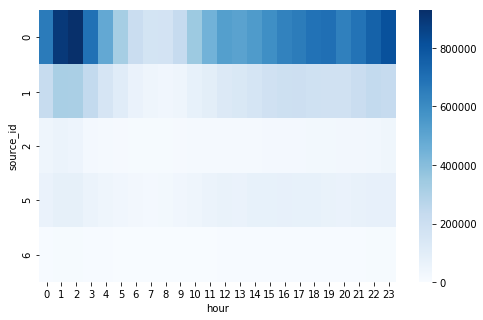

In [12]:
auctions['day'] = pd.DatetimeIndex(auctions['date']).day;
auctions['hour'] = pd.DatetimeIndex(auctions['date']).hour;
# top_device = [x for x in installs['device_model'].value_counts().head(10).keys()]
# top_group = installs.loc[installs['device_model'].isin(top_device)]

top_device1 = [x for x in auctions['source_id'].value_counts().head(5).keys()]
top_group1 = auctions.loc[auctions['source_id'].isin(top_device1)]
day_hours = top_group1.groupby([ 'source_id', 'hour'])['hour'].count().unstack()
day_hours
# day_hours = day_hours.fillna(0)
plt.figure(figsize=(8, 5))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")

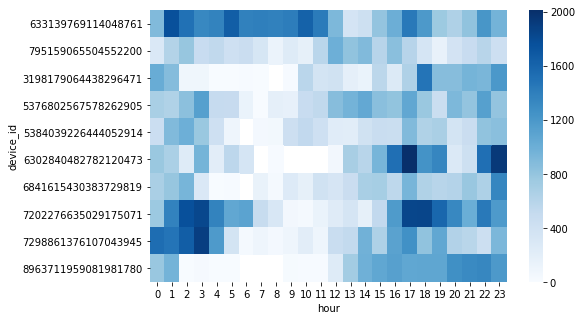

In [11]:
# top_device = [x for x in installs['device_model'].value_counts().head(10).keys()]
# top_group = installs.loc[installs['device_model'].isin(top_device)]

top_device1 = [x for x in auctions['device_id'].value_counts().head(10).keys()]
top_group1 = auctions.loc[auctions['device_id'].isin(top_device1)]
day_hours = top_group1.groupby([ 'device_id', 'hour'])['hour'].count().unstack()
day_hours
# day_hours = day_hours.fillna(0)
plt.figure(figsize=(8, 5))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")

In [21]:
top1 = [x for x in events['ref_hash'].value_counts().head(7).keys()]
top_group1 = events.loc[events['ref_hash'].isin(top1)]

top2 = [x for x in top_group1['application_id'].value_counts().head(5).keys()]
top_group2 = top_group1.loc[top_group1['application_id'].isin(top2)]

g = top_group2.groupby([ 'ref_hash', 'application_id']).count()['date'].unstack()
print(g)
# g.plot.hist(bins=12, alpha=0.5)
# plt.figure(figsize=(8, 8))
# heap_map = sns.heatmap(g, cbar=True, cmap="Blues")
# heap_map.set_title("", fontsize=18)
# heap_map.set_xlabel("", fontsize=14)
# heap_map.set_ylabel("", fontsize=14)

application_id          54      57      113     125     149
ref_hash                                                   
244029859389272148      NaN     NaN  2240.0     NaN     NaN
1706781657278990931     NaN     NaN     NaN  2300.0     NaN
5034957474698180142     NaN     NaN  1513.0     NaN  1168.0
5724169280369284055     NaN     NaN  1096.0     NaN  1428.0
7298478026707033340  2819.0     NaN     NaN     NaN     NaN
7526135353349769077     NaN  2079.0     NaN     NaN     NaN
7823950631004872496     NaN     NaN  1217.0     NaN  1696.0
